# Load the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import the packages

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the data

In [122]:
np.random.seed(42)

In [123]:
file_path = '/content/drive/My Drive/Colab Notebooks/hotel_bookings.csv'
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--","NaN"]
dataset = pd.read_csv(file_path,na_values = missing_value_formats)

In [124]:
dataset.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,NaN,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,NaN,0,0,Check-Out,2015-07-01
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.00,0,0,CHECK-OUT,2015-07-02
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort hotel,0.0,0.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,0,No Deposit,NaN,NaN,0.0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0.0,9.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,FB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,0,No Deposit,303.0,NaN,0.0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1.0,85.0,2015.0,July,27.0,1.0,0.0,3.0,2.0,0.0,0.0,BB,PRT,Online TA,TA/TO,0.0,0.0,0.0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1.0,75.0,2015.0,July,27.0,1.0,0.0,3.0,NaN,0.0,0.0,HB,PRT,Offline TA/TO,TA/TO,0.0,0.0,0.0,D,D,0,No Deposit,15.0,NaN,0.0,Transient,105.50,0,0,Canceled,2015-04-22


In [125]:
dataset.shape

(119399, 32)

# Remove dublicates records

In [126]:
dataset = dataset.drop_duplicates()

In [127]:
dataset.shape

(87865, 32)

There are 31534 dublicated records

# Hundling Missing values

There are many cells with empty values, the default nan method won't recognize them, we It is necessary to transform empty values into NaN to be recognized later on

---



In [128]:
def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan



In [129]:
# apply make_int function to the entire series using map
dataset['is_canceled'] = dataset['is_canceled'].map(make_int)
dataset['lead_time'] = dataset['lead_time'].map(make_int)
dataset['arrival_date_year'] = dataset['arrival_date_year'].map(make_int)
dataset['arrival_date_week_number'] = dataset['arrival_date_week_number'].map(make_int)
dataset['arrival_date_day_of_month'] = dataset['arrival_date_day_of_month'].map(make_int)
dataset['stays_in_weekend_nights'] = dataset['stays_in_weekend_nights'].map(make_int)
dataset['adults'] = dataset['adults'].map(make_int)
dataset['children'] = dataset['children'].map(make_int)
dataset['babies'] = dataset['babies'].map(make_int)
dataset['is_repeated_guest'] = dataset['is_repeated_guest'].map(make_int)
dataset['previous_cancellations'] = dataset['previous_cancellations'].map(make_int)
dataset['previous_bookings_not_canceled'] = dataset['previous_bookings_not_canceled'].map(make_int)
dataset['booking_changes'] = dataset['booking_changes'].map(make_int)
dataset['agent'] = dataset['agent'].map(make_int)
dataset['company'] = dataset['company'].map(make_int)
dataset['days_in_waiting_list'] = dataset['days_in_waiting_list'].map(make_int)
dataset['adr'] = dataset['adr'].map(make_int)
dataset['required_car_parking_spaces'] = dataset['required_car_parking_spaces'].map(make_int)
dataset['total_of_special_requests'] = dataset['total_of_special_requests'].map(make_int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


In [130]:
dataset.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,NaN,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3,No Deposit,NaN,NaN,0.0,Transient,NaN,0,0,Check-Out,2015-07-01
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,4,No Deposit,NaN,NaN,0.0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0,No Deposit,NaN,NaN,0.0,Transient,75.0,0,0,CHECK-OUT,2015-07-02
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0,No Deposit,304.0,NaN,0.0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,GBR,Online TA,TA/TO,0.0,0.0,0.0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort hotel,0.0,0.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,0,No Deposit,NaN,NaN,0.0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0.0,9.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,0.0,0.0,FB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,0,No Deposit,303.0,NaN,0.0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1.0,85.0,2015.0,July,27.0,1.0,0.0,3.0,2.0,0.0,0.0,BB,PRT,Online TA,TA/TO,0.0,0.0,0.0,A,A,0,No Deposit,240.0,NaN,0.0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1.0,75.0,2015.0,July,27.0,1.0,0.0,3.0,NaN,0.0,0.0,HB,PRT,Offline TA/TO,TA/TO,0.0,0.0,0.0,D,D,0,No Deposit,15.0,NaN,0.0,Transient,105.0,0,0,Canceled,2015-04-22
10,Resort Hotel,1.0,23.0,2015.0,July,27.0,1.0,0.0,4.0,2.0,0.0,0.0,BB,PRT,Online TA,TA/TO,0.0,0.0,0.0,E,E,0,No Deposit,240.0,NaN,0.0,Transient,123.0,0,0,Canceled,2015-06-23


How many null value in the dataset?

In [131]:
print(dataset.isnull().sum())

hotel                                41
is_canceled                          39
lead_time                            78
arrival_date_year                     5
arrival_date_month                   57
arrival_date_week_number              9
arrival_date_day_of_month             9
stays_in_weekend_nights               7
stays_in_week_nights                  1
adults                                2
children                              4
babies                               40
meal                                 76
country                             485
market_segment                       13
distribution_channel                114
is_repeated_guest                    63
previous_cancellations                5
previous_bookings_not_canceled        2
reserved_room_type                    1
assigned_room_type                    0
booking_changes                       0
deposit_type                          9
agent                             12260
company                           82586


In [132]:
dataset.shape

(87865, 32)

remove records with null value
Note that is possible to fill the missing values but in my case I prefer the easy way

In [133]:
dataset.dropna(axis=0,inplace=True)

In [134]:
dataset.shape

(186, 32)

It doesn't seem to be a wise decision 186 record left!! But in real life application, I will need to contact the decision maker to decide how to change the missing values. If I am the decision maker I will spend the whole day in this xD

# Fix structural errors

Replace in the arrival_date_month column the values that that are the same but written differently

In [135]:
dataset["arrival_date_month"].replace({"Aug": "August", "Feb":"February", "Jan":"January","Mar":"March","Dec":"December","Nov":"November","Apr":"April","Jun":"June", 
                                       "Jul":"July","Sep":"September","Oct":"October",}, inplace=True)

Make all the string values lowercase

In [136]:
dataset["hotel"] = dataset["hotel"].str.lower()
dataset["arrival_date_month"] = dataset["arrival_date_month"].str.lower()
dataset["meal"] = dataset["meal"].str.lower()
dataset["country"] = dataset["country"].str.lower()
dataset["market_segment"] = dataset["market_segment"].str.lower()
dataset["distribution_channel"] = dataset["distribution_channel"].str.lower()
dataset["reserved_room_type"] = dataset["reserved_room_type"].str.lower()
dataset["assigned_room_type"] = dataset["assigned_room_type"].str.lower()
dataset["deposit_type"] = dataset["deposit_type"].str.lower()
dataset["customer_type"] = dataset["customer_type"].str.lower()
dataset["reservation_status"] = dataset["reservation_status"].str.lower()


In [137]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,resort hotel,0.0,6.0,2015.0,october,42.0,11.0,2.0,0.0,2.0,0.0,0.0,bb,prt,online ta,ta/to,0.0,0.0,0.0,e,e,1,no deposit,240.0,113.0,0.0,transient,82.0,1,1,check-out,2015-10-13
2697,resort hotel,0.0,24.0,2015.0,october,44.0,26.0,7.0,15.0,1.0,0.0,0.0,bb,aut,corporate,corporate,0.0,0.0,0.0,e,g,2,no deposit,185.0,281.0,0.0,transient-party,52.0,0,0,check-out,2015-11-17
2867,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,0.0,3.0,2.0,0.0,0.0,bb,esp,corporate,corporate,0.0,0.0,0.0,a,a,1,no deposit,334.0,281.0,0.0,transient-party,48.0,0,0,check-out,2015-11-06
2877,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,2.0,10.0,1.0,0.0,0.0,bb,prt,corporate,corporate,0.0,0.0,0.0,a,a,2,no deposit,328.0,281.0,0.0,transient-party,40.0,0,0,check-out,2015-11-15
2878,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,3.0,10.0,2.0,0.0,0.0,bb,ita,corporate,corporate,0.0,0.0,0.0,a,a,2,no deposit,326.0,281.0,0.0,transient-party,48.0,0,0,check-out,2015-11-16


# Handling Outliers

In [138]:
dataset['lead_time']

2392        6.0
2697       24.0
2867       24.0
2877       24.0
2878       24.0
          ...  
112508     13.0
113055     13.0
113091     13.0
113636    210.0
116460    191.0
Name: lead_time, Length: 186, dtype: float64

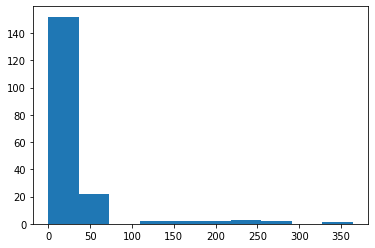

In [139]:
import matplotlib.pyplot as plt
plt.hist(dataset['lead_time'])
plt.show()

here most of values are between 0 and 40

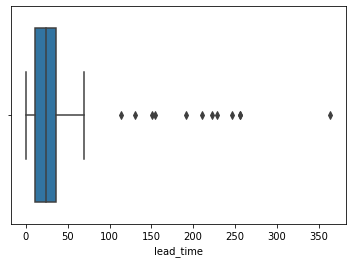

In [140]:
import seaborn as sns
sns.boxplot(x=dataset['lead_time'])

In [141]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                         0.00
lead_time                          25.00
arrival_date_year                   1.00
arrival_date_week_number           13.00
arrival_date_day_of_month           7.00
stays_in_weekend_nights             2.00
stays_in_week_nights                4.00
adults                              1.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     2.00
agent                             139.00
company                             6.00
days_in_waiting_list                0.00
adr                                45.75
required_car_parking_spaces         0.00
total_of_special_requests           0.00
dtype: float64


In [143]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(71, 32)

In [144]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2867,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,0.0,3.0,2.0,0.0,0.0,bb,esp,corporate,corporate,0.0,0.0,0.0,a,a,1,no deposit,334.0,281.0,0.0,transient-party,48.0,0,0,check-out,2015-11-06
2877,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,2.0,10.0,1.0,0.0,0.0,bb,prt,corporate,corporate,0.0,0.0,0.0,a,a,2,no deposit,328.0,281.0,0.0,transient-party,40.0,0,0,check-out,2015-11-15
2878,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,3.0,10.0,2.0,0.0,0.0,bb,ita,corporate,corporate,0.0,0.0,0.0,a,a,2,no deposit,326.0,281.0,0.0,transient-party,48.0,0,0,check-out,2015-11-16
2879,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,3.0,10.0,2.0,0.0,0.0,bb,ita,corporate,corporate,0.0,0.0,0.0,a,a,1,no deposit,326.0,281.0,0.0,transient,48.0,0,0,check-out,2015-11-16
2880,resort hotel,0.0,24.0,2015.0,november,45.0,3.0,3.0,10.0,2.0,0.0,0.0,bb,esp,corporate,corporate,0.0,0.0,0.0,a,a,2,no deposit,334.0,281.0,0.0,transient-party,48.0,0,0,check-out,2015-11-16
